<h1>FEATURE SELECTION TECHNIQUES</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#### We shall load the dataset for CO2 emissions for Canada

df = pd.read_csv("CO2 Emissions_Canada.csv")

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [5]:
# Let's investigate duplicate columns

def getDuplicateColumns(ff):
    
    #create an empty set
    
    duplicateColumnNames = set()
    
    #Iterate through all the columns of dataframe
    
    for x in range(df.shape[1]):
        
        # take column at xth index
        col = df.iloc[:, x]
        
        
         # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        
        for y in range(x+1, df.shape[1]):
            
            # Take columns at yth index
            
            otherCol = df.iloc[:, y]
            
            
            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding
            # to the set
            
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                
            else:
                print("No duplicate column")
                
    return list(duplicateColumnNames) 
        

In [6]:
duplicateColName = getDuplicateColumns(df)

for col in duplicateColName:
    print("Column", col)

No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column
No duplicate column


### Univariate selection

In [7]:

X = df[["Engine Size(L)", "Cylinders","Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", \
       "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)"]]
y = df.iloc[:, -1]

In [8]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2 Emissions(g/km), dtype: int64

In [9]:
X.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27


In [10]:
from sklearn.feature_selection import SelectKBest #Also called Information Gain
from sklearn.feature_selection import chi2

In [11]:
df.shape

(7385, 12)

In [12]:
ordered_rank_features = SelectKBest(score_func=chi2, k="all")
ordered_feature = ordered_rank_features.fit(X,y)

In [13]:
df_scores = pd.DataFrame(ordered_feature.scores_, columns=["Scores"])
df_columns = pd.DataFrame(X.columns)

In [14]:
feature_rank = pd.concat([df_columns, df_scores], axis=1)

In [15]:
feature_rank.columns = ["Features", "Score"]

feature_rank

,Features,Score
0,Engine Size(L),3393.381248
1,Cylinders,3411.646865
2,Fuel Consumption City (L/100 km),6230.860735
3,Fuel Consumption Hwy (L/100 km),3293.413062
4,Fuel Consumption Comb (L/100 km),4861.584394
5,Fuel Consumption Comb (mpg),13235.236391


In [27]:
feature_rank.nlargest(7, "Score")

,Features,Score
5,Fuel Consumption Comb (mpg),13235.236391
2,Fuel Consumption City (L/100 km),6230.860735
4,Fuel Consumption Comb (L/100 km),4861.584394
1,Cylinders,3411.646865
0,Engine Size(L),3393.381248
3,Fuel Consumption Hwy (L/100 km),3293.413062


#### Feature Importance

This technique gives you a score for each feature of your data, the higher the score the more relevant it has

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

model.fit(X,y)

ExtraTreesClassifier()

In [18]:
print(model.feature_importances_)

[0.16848511 0.02566175 0.24325954 0.2615708  0.21977203 0.08125076]


In [24]:
ranked_features = pd.Series(model.feature_importances_, index = X.columns)

<AxesSubplot:>

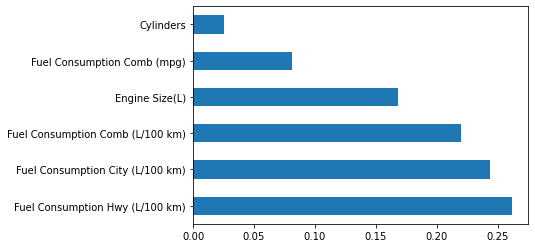

In [26]:
ranked_features.nlargest(7).plot(kind="barh")

#### correlation

A quick note to take is:

1: When the value of both independent and dependent variable are increasing, then there is a positive correlation

2: When both of the values are decreasing, there is a negative correlation

3: When either of the values is increasing and the other is decreasing, you will term that as an inverse correlation

<AxesSubplot:>

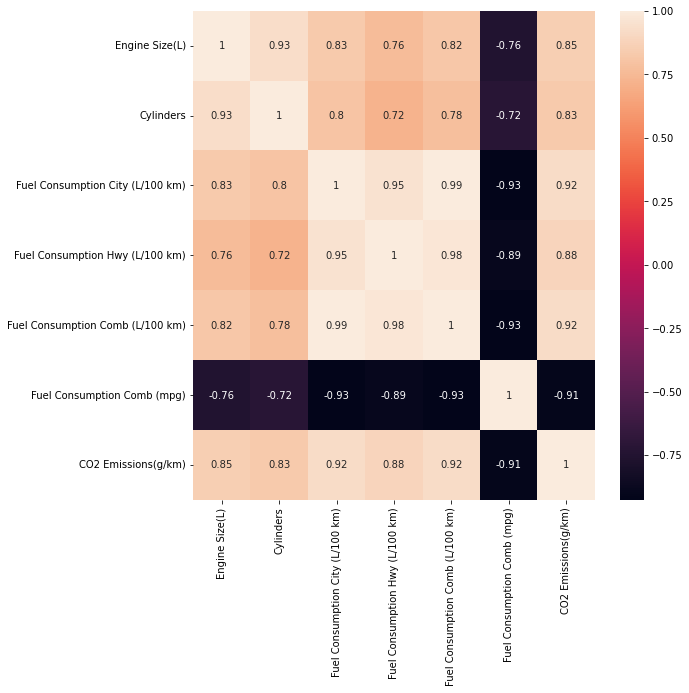

In [29]:
corr = df.corr()
top_features = corr.index

plt.figure(figsize=(9,9))

sns.heatmap(df[top_features].corr(), annot=True)

In [30]:
#we will love to remove the independent features that are correlated to ech other without the dependent
threshold = .8

In [37]:
def correlation(dataset, threshold):
    
    col_corr = set() #set of all the correlated columns
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
            else:
                pass
    return col_corr

In [39]:
correlation(df.iloc[:,:-1], threshold)

{'Cylinders',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)',
 'Fuel Consumption Hwy (L/100 km)'}

#### Information gain

using the sklearn library mutual_info_classif

In [40]:
from sklearn.feature_selection import mutual_info_classif

In [42]:
mutual_info = mutual_info_classif(X,y)

In [44]:
mutual_data = pd.Series(mutual_info, index=X.columns)
mutual_data.sort_values(ascending=False)

Fuel Consumption Comb (L/100 km)    3.442628
Fuel Consumption Comb (mpg)         2.742941
Fuel Consumption City (L/100 km)    2.295853
Fuel Consumption Hwy (L/100 km)     1.790833
Engine Size(L)                      1.096212
Cylinders                           0.877945
dtype: float64